<a href="https://colab.research.google.com/github/miaonaise/Lynx_case/blob/main/Spiff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tslearn
!pip install import_ipynb
!pip install dtw-python

#0: Initial Stuff


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from tslearn.clustering import TimeSeriesKMeans
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

from scipy.cluster.hierarchy import single, complete, dendrogram


import dtw

# Set up Google drive
from google.colab import drive
drive.mount('/content/gdrive')

# Change current working directory
import os
os.chdir('/content/gdrive/My Drive/Colab Notebooks/Lynx_case/')


import import_ipynb

# Import modules
import functions
import plotting


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Read data

In [ ]:
df_prices = pd.read_excel('Junior Assignment 2021.xlsx', sheet_name = 'prices')
days = df_prices['day']

df_prices.head()

# numpy array version
arr_prices = np.delete(np.array(df_prices),0,1) # delete first column because it is days
arr_days = np.array(df_prices)[:,0]

Info parameters

In [ ]:
commodities = df_prices.columns[1:]

Simple visualization

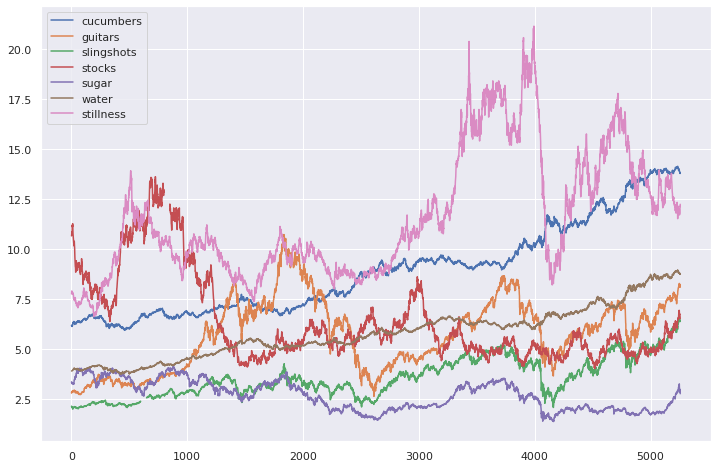

In [ ]:
plt.figure(figsize = (12,8))
for item in commodities:
  plt.plot(df_prices['day'],df_prices[item])
plt.legend(commodities)

# 1: Time Series Analysis

### 1.1 [Distribution plots, Time Series Plots, Q-Q plots] : [logReturn, smoothed logReturn, scaled logReturn]

In [ ]:
# original logReturns

df_logReturns = np.log(df_prices).diff()
df_logReturns['day'] = df_prices['day']

#plotting.DFSubGraphHist(df = df_logReturns)

In [ ]:
# EWM logReturns
span = 20

df_logReturns_ewm = df_logReturns.ewm(span = span, adjust = False).mean()
df_logReturns_ewm['day'] = df_prices['day']

#plotting.DFSubGraphHist(df = df_logReturns_ewm[int(span/2):], df2 = df_logReturns,xlim = 0.03,ylim = 1200,xlim2 = 0.03)

In [ ]:
# EWM volatility
span = 20

df_volatility = df_logReturns.ewm(span = span).std()
df_volatility['day'] = df_prices['day']
df_logReturns_scaled = df_logReturns/df_volatility
df_logReturns_scaled['day'] = df_prices['day']

#plotting.DFSubGraphHist(df = df_logReturns_scaled,df2 = None,xlim = 5,ylim=500)

In [ ]:
# SMA logReturns
#logReturns_smooth,logReturns_days_smooth = functions.simple_moving_average(k_smooth, logReturns, logReturns_days)

#plotting.SubGraphHist(x = logReturns_days_smooth, y = logReturns_smooth, label = commodities)

In [ ]:
# Q-Q plot

#plotting.QQnormal(logReturns,commodities,std=1)
#plotting.DFQQnormal(df_logReturns_EWscaled,y_label='scaled logReturns')

### 1.2 Volatility

In [ ]:
plotting.DFSubGraphHist_volatility(df = df_volatility)

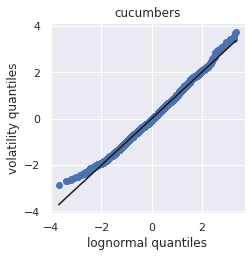

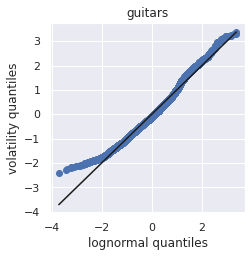

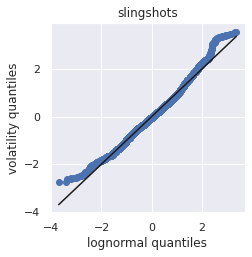

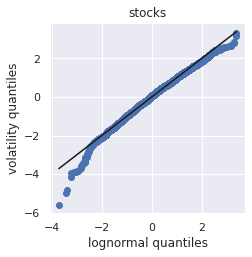

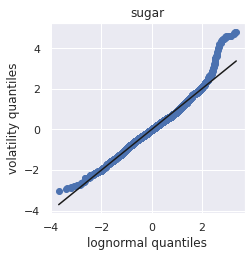

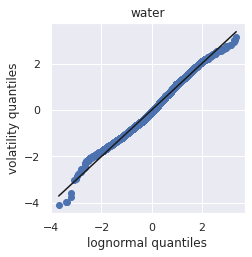

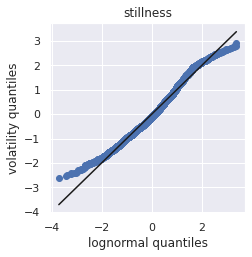

In [ ]:
plotting.DFQQlognormal(df_volatility)

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


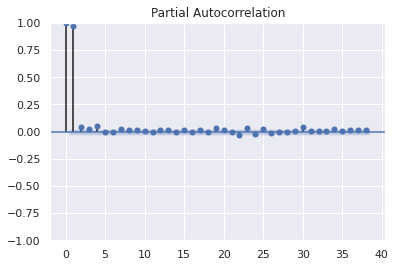

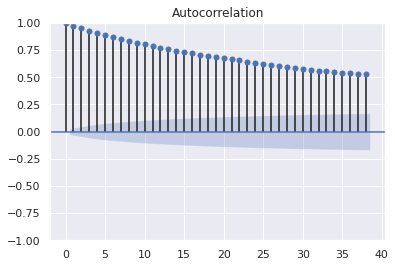

In [ ]:
# Check pacf and acf of volatility

data = df_volatility['cucumbers'].dropna()

plot_pacf(data);
plot_acf(data);

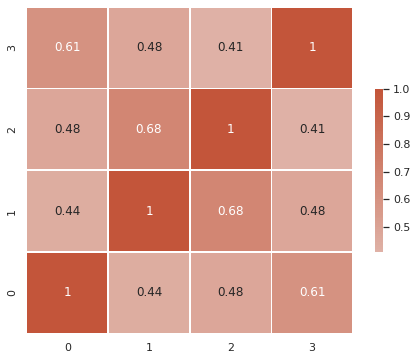

In [ ]:
# Since volatility is lognormal. Log(volatility) is normal.
df_log_volatility = np.log(df_volatility)
df_log_volatility['day'] = df_prices['day']

data_truncated = df_log_volatility.iloc[649:,1:]
data_truncated = data_truncated[["cucumbers", "guitars","slingshots","water"]]
data_mean = data_truncated.mean()
data_corr = np.corrcoef(data_truncated,rowvar = False)

sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax = sns.heatmap(data_corr, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
ax.invert_yaxis()
plt.show()

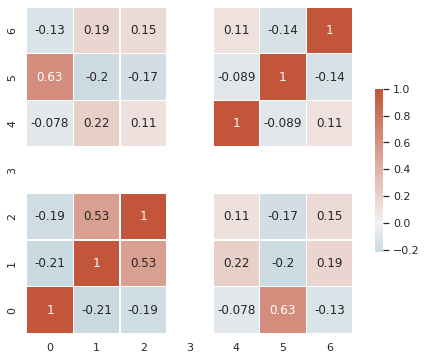

In [ ]:
# Correlation matrix of logReturn_scaled
data_truncated = df_logReturns_scaled.iloc[649:,1:]
#data_truncated = data_truncated[["cucumbers", "guitars","slingshots","water"]]
data_mean = data_truncated.mean()
data_corr = np.corrcoef(data_truncated,rowvar = False)

sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax = sns.heatmap(data_corr, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
ax.invert_yaxis()
plt.show()

### 1.3 Correlation matrix

In [ ]:
# MINI SIDE ANALYSIS

#df_prices['slingshots'].loc[df_prices['slingshots'].notnull() == False]
#max is 647, min is 598
#df_prices['stocks'].loc[df_prices['stocks'].notnull() == False]
#max is 847, min is 798
#so we can truncate from 848

In [ ]:
commodities

Index(['cucumbers', 'guitars', 'slingshots', 'stocks', 'sugar', 'water',
       'stillness'],
      dtype='object')

In [ ]:
# Assumes that the samples are independent
logReturn_truncated = df_logReturns.iloc[849:,1:]

logReturn_mean = np.mean(logReturn_truncated,axis = 0)
logReturn_corr = np.corrcoef(logReturn_truncated,rowvar = False)

sns.set_theme(style="white")
#mask = np.triu(np.ones_like(logReturn_corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax = sns.heatmap(logReturn_corr, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
ax.invert_yaxis()
plt.show()

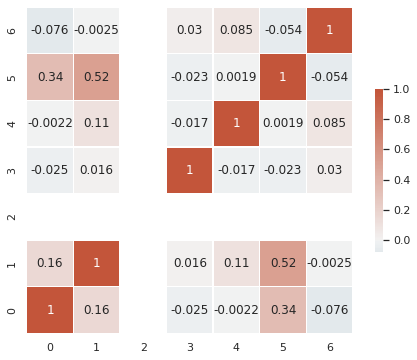

In [ ]:
# Assumes that the samples are independent
logReturn_truncated = df_logReturns.iloc[1:798,1:]

logReturn_mean = np.mean(logReturn_truncated,axis = 0)
logReturn_corr = np.corrcoef(logReturn_truncated,rowvar = False)

sns.set_theme(style="white")
#mask = np.triu(np.ones_like(logReturn_corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax = sns.heatmap(logReturn_corr, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
ax.invert_yaxis()
plt.show()

### 1.4 ACF and PACF of the time series


In [ ]:
for item in commodities:
  data = df_logReturns[item]
  plot_pacf(data);
  plot_acf(data);

  # Augmented Dickey Fuller test for stationarity
  ad_fuller_result = adfuller(data)
  print(f'ADF Statistic: {ad_fuller_result[0]}')
  print(f'p-value: {ad_fuller_result[1]}')

####(Abandoned) Fit ARMA

In [ ]:
# ABANDONED SECTION
# will fail 100%
# Attempted fiting ARMA time series model on logReturns

col = 5
dts = logReturns[:,col]

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dts, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dts, lags=40, ax=ax2)

mod = sm.tsa.ARIMA(dts, order=(0, 0, 1))
res = mod.fit()
print(res.summary())


resid = res.resid
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line="q", ax=ax, fit=True)

### 1.5 Clustering

#### Hierarchical

In [ ]:
smooth_logReturn = df_logReturns.iloc[849:,1:].ewm(span = 20, adjust = False).mean()
smooth_prices = df_prices.iloc[848:,1:].ewm(span=20, adjust = False).mean()
smooth_logPrices = np.log(df_prices.iloc[848:,1:]/df_prices.iloc[848,1:]).ewm(span=20, adjust = False).mean()


smooth_logReturn_corr = smooth_logReturn.corr()
smooth_prices_corr = smooth_prices.corr()
smooth_logPrices_corr = smooth_logPrices.corr()

In [ ]:
def dtw_matrix(df):
  items = df.columns
  matrix = pd.DataFrame(np.zeros((len(items),len(items))),
                                 index=items,
                                 columns=items)
  # Build distance matrix
  for i in items:
      for j in items:
          x = df[i]
          y = df[j]
          if i != j:
              dist = dtw.dtw(x, y).distance
              matrix.loc[i, j] = dist
  return matrix


smooth_logReturn_dtw = dtw_matrix(smooth_logReturn)
#smooth_prices_dtw = dtw_matrix(smooth_prices)
smooth_logPrices_dtw = dtw_matrix(smooth_logPrices)

In [ ]:
Z = complete(smooth_logPrices_dtw)
Z1 = single(smooth_logPrices_corr)

fig = plt.figure(figsize= (16,8))
dn = dendrogram(Z,labels = smooth_logPrices.columns)
plt.show()
fig = plt.figure(figsize= (16,8))
dn = dendrogram(Z1,labels = smooth_logPrices.columns)
plt.show()

In [ ]:
Z = complete(smooth_logReturn_dtw)
Z1 = single(smooth_logReturn_corr)

fig = plt.figure(figsize= (16,8))
dn = dendrogram(Z,labels = commodities)
plt.show()
fig = plt.figure(figsize= (16,8))
dn = dendrogram(Z1,labels = commodities)
plt.show()

#### K-means

In [ ]:
for n in range(2,5):
  model = TimeSeriesKMeans(n_clusters=n, metric="dtw", max_iter=20)
  ehhh = model.fit_predict(np.transpose(smooth_logPrices))
  name = 'Kmeans_'+str(n)+'_smooth_logPrices'
  np.save('name',ehhh)

# 2: Interpolation

### 2.1 (Abandoned) Bad Interpolation

In [58]:
# ABANDONED SECTION
# This section is abandonED and will fail for sure
# It is an attempt of using normal interpolation method on the data (with a cubic function)

In [ ]:
start = 0
stop = 500
plt.figure(figsize = (15,6))
plt.plot(logReturns_days[start+k_smooth:stop+k_smooth], logReturns[start+k_smooth:stop+k_smooth,3])
plt.plot(logReturns_days_smooth[start:stop],logReturns_smooth[start:stop,3])

In [ ]:
from scipy.interpolate import interp1d

#847, min is 798
idx = np.argwhere(np.isnan(logReturns_smooth[:,3])).flatten()
x = np.delete(logReturns_days_smooth,idx)
y = np.delete(logReturns_smooth[:,3],idx)
f = interp1d(x,y, kind='cubic')
xnew = logReturns_days_smooth
plt.plot(x[600:900], y[600:900], 'o', xnew[600:900], f(xnew)[600:900], '-')
plt.legend(['data', 'cubic'], loc='best')
plt.show()



### 2.2 Good Interpolation

In [57]:
# Different ways of interpolation is used for Stocks and Slingshots 
# What is required is df_prices and df_logReturns in order to run both sections. 

#### Stocks

In [ ]:
# Stocks interpolation

n_quantiles = 10
n_init_samp = 10000

stocks_price = df_prices['stocks']
first_price = stocks_price[797]
actual_last_price = stocks_price[848]
print('Actual last price: ',actual_last_price)


Actual last price:  12.125542709778793


In [ ]:
### Direct modelling via logReturns ###

stocks_mean = df_logReturns['stocks'].mean()
stocks_std = df_logReturns['stocks'].std()
nmlr = len(df_logReturns['stocks'][798:849]) # number of missing log returns
nmp = len(df_prices['stocks'][798:848]) # number of missing prices

sample_LR = np.random.normal(loc = stocks_mean, scale = stocks_std, size = (n_init_samp, nmlr))
sample_ExpCumLR = np.exp(np.cumsum(sample_LR, axis = 1))

estimated_last_price = first_price*sample_ExpCumLR[:,-1]

# Plot: Estimated last prices
plt.plot(estimated_last_price)
plt.plot(range(n_init_samp),np.ones(n_init_samp)*first_price, label = 'First price')
plt.plot(range(n_init_samp),np.ones(n_init_samp)*actual_last_price, label = 'Actual last price')
plt.legend()
plt.title('Estimated last prices from inital sampling')

# Filter 
idx = [i for i in range(n_init_samp) if estimated_last_price[i] > 12 and estimated_last_price[i] < 12.25]
selected_sample_prices = first_price*sample_ExpCumLR[idx]
print('Number of selected samples: ', len(selected_sample_prices))

# Plot: Selected sample prices
plt.figure()
for i in range(len(selected_sample_prices)):
  plt.plot(range(798,849),selected_sample_prices[i,:])
plt.title('All selected sample prices')
plt.xlabel('days')
plt.ylabel('price')

# Plot: Quantiles with context
mean,quantiles = functions.get_quantiles(selected_sample_prices, n_quantiles)
plt.figure()
for i in range(n_quantiles):
  plt.plot(range(798,849), quantiles[i,:],'tab:orange')
plt.plot(range(750,900),stocks_price[750:900],label = 'Real price')
plt.legend()
plt.title('Quantile plot of estimated Stock price')


In [ ]:
# Modelling via Volatility
com = 8

df_volatility = df_logReturns.ewm(com=com).std()
df_volatility['day'] = df_prices['day']
df_logReturns_scaled = df_logReturns/df_volatility
df_logReturns_scaled['day'] = df_prices['day']

stocks_volatility = df_volatility['stocks'].dropna().clip(0.01,0.02)
stocks_volatility_mean = stocks_volatility.mean()
stocks_volatility_std = stocks_volatility.std()

stocks_LRscaled_mean = df_logReturns_scaled['stocks'].mean()
stocks_LRscaled_std = df_logReturns_scaled['stocks'].std()

sample_volatility = np.random.normal(loc = stocks_volatility_mean, scale = stocks_volatility_std, size = (n_init_samp, nmlr))
sample_LRscaled = np.random.normal(loc = stocks_LRscaled_mean, scale = stocks_LRscaled_std, size = (n_init_samp, nmlr))

sample_LR = sample_LRscaled*sample_volatility


Number of selected samples:  679


Text(0.5, 1.0, 'Quantile plot of estimated Stock price')

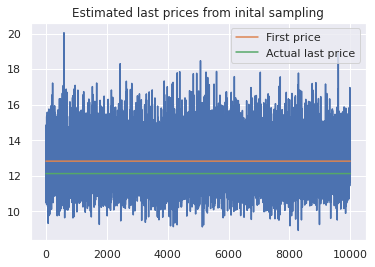

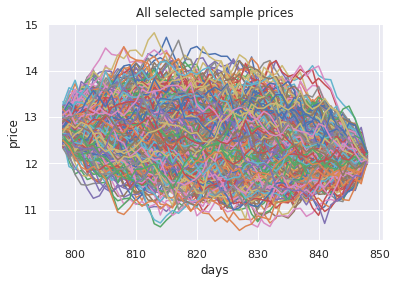

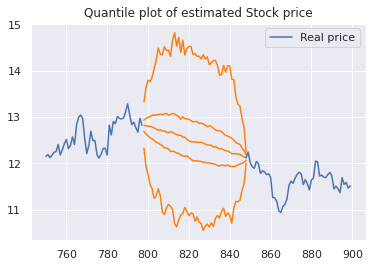

In [ ]:
sample_ExpCumLR = np.exp(np.cumsum(sample_LR, axis = 1))
estimated_last_price = first_price*sample_ExpCumLR[:,-1]

# Plot: Estimated last prices
plt.plot(estimated_last_price)
plt.plot(range(n_init_samp),np.ones(n_init_samp)*first_price, label = 'First price')
plt.plot(range(n_init_samp),np.ones(n_init_samp)*actual_last_price, label = 'Actual last price')
plt.legend()
plt.title('Estimated last prices from inital sampling')

# Filter 
idx = [i for i in range(n_init_samp) if estimated_last_price[i] > 12 and estimated_last_price[i] < 12.25]
selected_sample_prices = first_price*sample_ExpCumLR[idx]
print('Number of selected samples: ', len(selected_sample_prices))

# Plot: Selected sample prices
plt.figure()
for i in range(len(selected_sample_prices)):
  plt.plot(range(798,849),selected_sample_prices[i,:])
plt.title('All selected sample prices')
plt.xlabel('days')
plt.ylabel('price')

# Plot: Quantiles with context
mean,quantiles = functions.get_quantiles(selected_sample_prices, n_quantiles)
plt.figure()
for i in range(n_quantiles):
  plt.plot(range(798,849), quantiles[i,:],'tab:orange')
plt.plot(range(750,900),stocks_price[750:900],label = 'Real price')
plt.legend()
plt.title('Quantile plot of estimated Stock price')

#### Slingshots 

In [ ]:
# parameters
n_init_samp = 10000
n_quantiles = 10
factors_volatility = ['cucumbers','guitars','water']
factors_logReturn = ['cucumbers','guitars','water']

slingshots_price = df_prices['slingshots']
first_price = slingshots_price[597]
actual_last_price = slingshots_price[648]
print('Actual last price: ',actual_last_price)

span = 20
df_volatility = df_logReturns.ewm(span = span).std()
df_volatility['day'] = df_prices['day']
df_logReturns_scaled = df_logReturns/df_volatility
df_logReturns_scaled['day'] = df_prices['day']


Actual last price:  2.560146257714539


In [ ]:
df_log_volatility[factors_volatility]

,cucumbers,guitars,water
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,-5.050313,-4.335906,-6.778023
3,-5.352539,-4.424445,-6.980030
4,-5.385778,-4.652629,-7.115070
...,...,...,...
5251,-5.786583,-4.854157,-5.827005
5252,-5.820284,-4.747285,-5.861599
5253,-5.863246,-4.773509,-5.852887
5254,-5.906620,-4.759705,-5.902912


In [ ]:

# conditional multivariate
def conditional_mean_var(mean,cov,a):
  # Returns the conditional mean and variance of slingshots
  # place slingshot in the first column
  
  mean_arr = np.array(mean)
  cov_arr = np.array(cov)
  a_arr = np.array(a)
  
  m1 = mean_arr[0]
  m2 = mean_arr[1:]

  C11 = cov_arr[0,0]
  C12 = cov_arr[0,1:]
  C21 = cov_arr[1:,0]
  C22 = cov_arr[1:,1:]
  iC22 = np.linalg.inv(C22)
  
  cond_mean = m1 + C12.dot(iC22).dot(a_arr - m2)
  cond_var = C11 - C12.dot(iC22).dot(C21)

  return cond_mean,cond_var


def n_estimates_slingshots(n, data,dependencies = [commodities[i] for i in range(7) if commodities[i] != 'slingshots'] ,mrange = [598,648]):
  
  # given that the data is normally distributed
  # conditional "data" estimates of slingshots

  items = ['slingshots'] + dependencies
  print('items', items)

  reordered_data = data[items]
  
  cond_data = reordered_data.iloc[598:649]
  df1 = reordered_data[:598]
  df2 = reordered_data[649:]
  truncated_data = pd.concat([df1,df2])

  nmlr = mrange[1]-mrange[0] + 1
  print('nmlr: ',nmlr)
  samples = np.zeros((n_init_samp,nmlr))
  for i in range(nmlr):
    t = mrange[0] + i
    cond_data = reordered_data.iloc[t,1:]
    cond_mean, cond_var = conditional_mean_var(truncated_data.mean(),truncated_data.cov(),cond_data)
    samples[:,i] = np.random.normal(loc = cond_mean, scale = np.sqrt(cond_var), size = n_init_samp)
  
  return samples



df_log_volatility = np.log(df_volatility)
sample_log_volatility = n_estimates_slingshots(n_init_samp, data = df_log_volatility, dependencies = factors_volatility)
sample_volatility = np.exp(sample_log_volatility)

sample_logReturns_scaled = n_estimates_slingshots(n_init_samp, data = df_logReturns_scaled, dependencies = factors_volatility)

sample_LR = sample_logReturns_scaled*sample_volatility

items ['slingshots', 'cucumbers', 'guitars', 'water']
nmlr:  51
items ['slingshots', 'cucumbers', 'guitars', 'water']
nmlr:  51


Number of selected samples:  2027


Text(0.5, 1.0, 'Quantile plot of estimated Slingshot price')

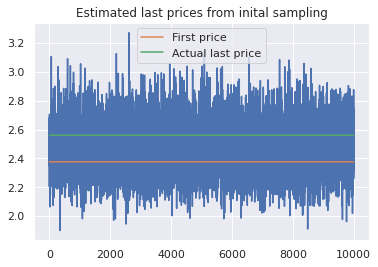

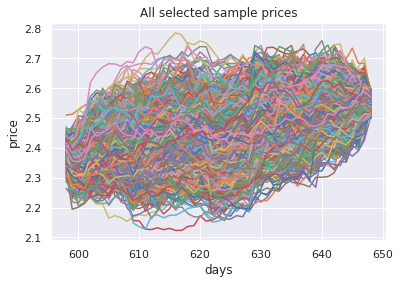

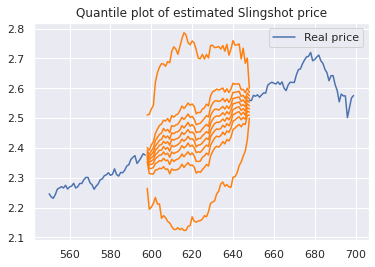

In [ ]:
sample_ExpCumLR = np.exp(np.cumsum(sample_LR, axis = 1))
estimated_last_price = first_price*sample_ExpCumLR[:,-1]

# Plot: Estimated last prices
plt.plot(estimated_last_price)
plt.plot(range(n_init_samp),np.ones(n_init_samp)*first_price, label = 'First price')
plt.plot(range(n_init_samp),np.ones(n_init_samp)*actual_last_price, label = 'Actual last price')
plt.legend()
plt.title('Estimated last prices from inital sampling')

# Filter 
idx = [i for i in range(n_init_samp) if estimated_last_price[i] > 2.5 and estimated_last_price[i] < 2.6]
selected_sample_prices = first_price*sample_ExpCumLR[idx]
print('Number of selected samples: ', len(selected_sample_prices))

# Plot: Selected sample prices
plt.figure()
for i in range(len(selected_sample_prices)):
  plt.plot(range(598,649),selected_sample_prices[i,:])
plt.title('All selected sample prices')
plt.xlabel('days')
plt.ylabel('price')

# Plot: Quantiles with context
mean,quantiles = functions.get_quantiles(selected_sample_prices, n_quantiles)
plt.figure()
for i in range(n_quantiles):
  plt.plot(range(598,649), quantiles[i,:],'tab:orange')
plt.plot(range(550,700),slingshots_price[550:700],label = 'Real price')
plt.legend()
plt.title('Quantile plot of estimated Slingshot price')

# 3: Trading Strategy

In [ ]:
# Trading strategies
def simple_MA_crossing(data,fast,slow,currency = 1000):
  ewm_slow = data.ewm(span = slow).mean()
  ewm_fast = data.ewm(span = fast).mean()
  position = currency*np.sign(ewm_fast-ewm_slow)
  return position

def scaled_MA_crossing(data,fast,slow, vol_span = 20,currency = 1000):
  ewm_slow = data.ewm(span = slow).mean()
  ewm_fast = data.ewm(span = fast).mean()
  volatility = data.ewm(span = vol_span).std()
  position = currency*np.sign(ewm_fast-ewm_slow)/volatility
  return position

# def original_MA_crossing(data,fast,slow,init_currency = 1000):
#   ewm_slow = data.ewm(span = slow).mean()
#   ewm_fast = data.ewm(span = fast).mean()
#   sign = np.sign(ewm_fast-ewm_slow)



In [ ]:
# Get result fucntions
def get_profit(data,currency_position):
  # assumes new intial position everytime
  # returns cumulative profit
  profit = data.pct_change() * currency_position.shift(periods = 1)
  profit = profit.cumsum()
  return profit

def get_profit2(data,currency_position):
  # assumed fixed position everytime ONLY when change in signal
  # can only handle CP with binary positions
  # returns cumulative profit
  n = len(data)
  profit = pd.DataFrame(np.zeros(n))

  # for consistency, first value is NaN and second value is always 0. i.e. we iterate profit from day 3 (idx = 2).
  # day 1: we can only observe, because no observations are available for strategy.
  # day 2: we do not take any position because there is no crossing (the two MA will start with the same value).
  # day 3: we trade in the morning and observe first profit at the end of the day.

  profit.iloc[0] = np.nan

  date_of_price = 1
  for i in range(2,n):
    if np.sign(currency_position[i-1]*currency_position[i-2]) == -1:
      # switch position
      date_of_price = i-1

      profit_increment = currency_position[i-1] * (data[i]-data[i-1])/data[date_of_price]
      profit.iloc[i] = profit.iloc[i-1] + profit_increment  
    else:
      # update profit
      profit_increment = currency_position[i-1] * (data[i]-data[i-1])/data[date_of_price]
      profit.iloc[i] = profit.iloc[i-1] + profit_increment

  return profit

def get_sharpe_and_drawdown(profit):
  expected_return = profit.pct_change().dropna()
  expected_return = expected_return[~expected_return.isin([np.inf, -np.inf])]

  sharpe = expected_return.mean()/expected_return.std()
  drawdown = expected_return.min()
  return sharpe,drawdown

0    0.001291
dtype: float64

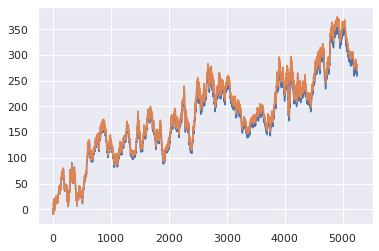

In [ ]:
# Display 
sample = df_prices['cucumbers']

profit = get_profit(sample,simple_MA_crossing(sample,20,50))
SR, DD = get_sharpe_and_drawdown(profit)
# profit2 = get_profit(sample,scaled_MA_crossing(sample,20,50))
# SR2, DD2 = get_sharpe_and_drawdown(profit2)
profit2 = get_profit2(sample,simple_MA_crossing(sample,20,50))
SR2, DD2 = get_sharpe_and_drawdown(profit2)

plt.plot(profit)
plt.plot(profit2)

#print(SR,DD)
#print(SR2,DD2)